In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the filtered DataFrame from the CSV file
filtered_df = pd.read_csv('data/filtered_data.csv')

# Display the first few rows of the DataFrame to verify it loaded correctly
print(filtered_df.head())

         date           Company Name   Symbol                    author  \
0  2024-07-29  havells india limited  HAVELLS        Geojit BNP Paribas   
1  2024-07-21  havells india limited  HAVELLS               Anand Rathi   
2  2024-07-19  havells india limited  HAVELLS      Keynote Capitals Ltd   
3  2024-07-19  havells india limited  HAVELLS       Prabhudas Lilladhar   
4  2024-06-05  havells india limited  HAVELLS  BOB Capital Markets Ltd.   

           Sector  expected_return  actual_return  
0  Consumer Goods       -10.535481      -0.011863  
1  Consumer Goods        21.345773       0.036465  
2  Consumer Goods        -2.742437       0.039960  
3  Consumer Goods        11.733107       0.039960  
4  Consumer Goods        -0.713967       0.011188  


In [2]:
# Calculate correlation
correlation = filtered_df[['expected_return', 'actual_return']].corr().iloc[0, 1]
print(f"Correlation between expected returns and actual returns: {correlation}")

Correlation between expected returns and actual returns: -0.029279284079480924


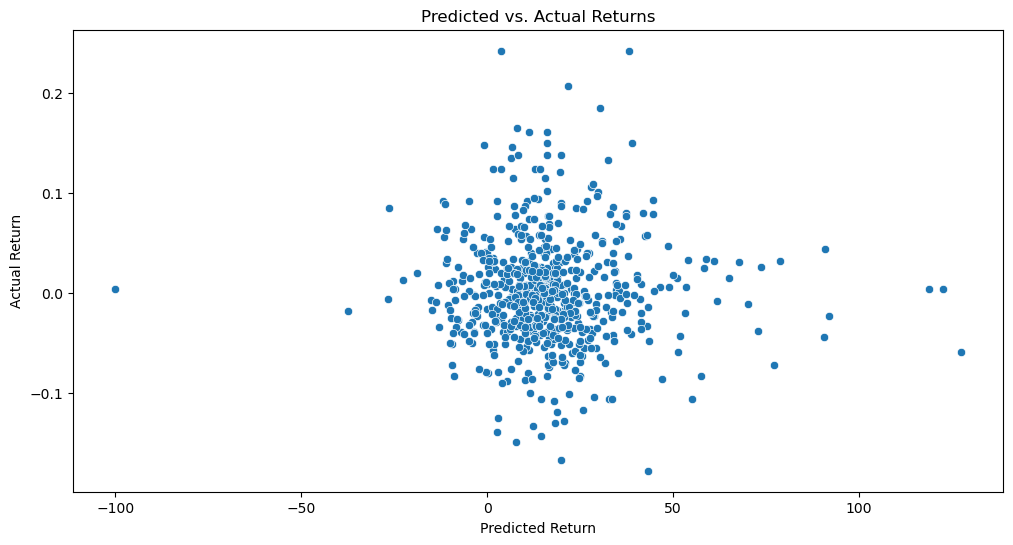

In [3]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='expected_return', y='actual_return')
plt.title('Predicted vs. Actual Returns')
plt.xlabel('Predicted Return')
plt.ylabel('Actual Return')
plt.show()


In [6]:
# Groupby Timelines
import pandas as pd

# Step 1: Extract the year from the 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate the correlation between actual and expected return grouped by year
# Ensure you have an 'actual_return' column calculated in your DataFrame
correlation_by_year = filtered_df.groupby('year').apply(
    lambda group: group[['expected_return', 'actual_return']].corr().iloc[0, 1]
)

# Print the correlation results for each year
print("Correlation between expected and actual returns by year:")
print(correlation_by_year)

Correlation between expected and actual returns by year:
year
2013         NaN
2014         NaN
2015    0.034897
2016   -0.044052
2017    0.285551
2018   -0.204528
2019   -0.088272
2020    0.070569
2021    0.027652
2022   -0.074631
2023    0.221254
2024   -0.208925
dtype: float64


C:\Users\disch\AppData\Local\Temp\ipykernel_4676\3742466470.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year = filtered_df.groupby('year').apply(


In [9]:
# Step 1: Extract the year from the 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate the correlation between actual and expected returns grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by 'year' and 'Symbol' (ticker) and calculate correlation
correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns for each ticker in each year
mapped_returns = filtered_df.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge the correlation and return mappings
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Print the results
print("Correlation, expected and actual returns by year and ticker:")
print(merged_results)


Correlation, expected and actual returns by year and ticker:
     year     Symbol  correlation  expected_return  actual_return
0    2013    HAVELLS          NaN              NaN       0.005070
1    2014    HAVELLS          NaN         7.591378       0.043472
2    2015    ACLGATI          NaN        58.144176       0.025457
3    2015  AURIONPRO          NaN        72.884440      -0.037464
4    2015    DHANUKA       1.0000        10.037672      -0.072519
..    ...        ...          ...              ...            ...
112  2024    PREMIER          NaN              NaN            NaN
113  2024   RELIGARE          NaN       127.301859      -0.058444
114  2024    ROSSARI       0.0868        20.428919       0.009161
115  2024       RVNL       1.0000        -1.662380       0.127137
116  2024       VSSL          NaN              NaN            NaN

[117 rows x 5 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_4676\2612998841.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


C:\Users\disch\AppData\Local\Temp\ipykernel_4676\3784741381.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')


<Figure size 1400x800 with 0 Axes>

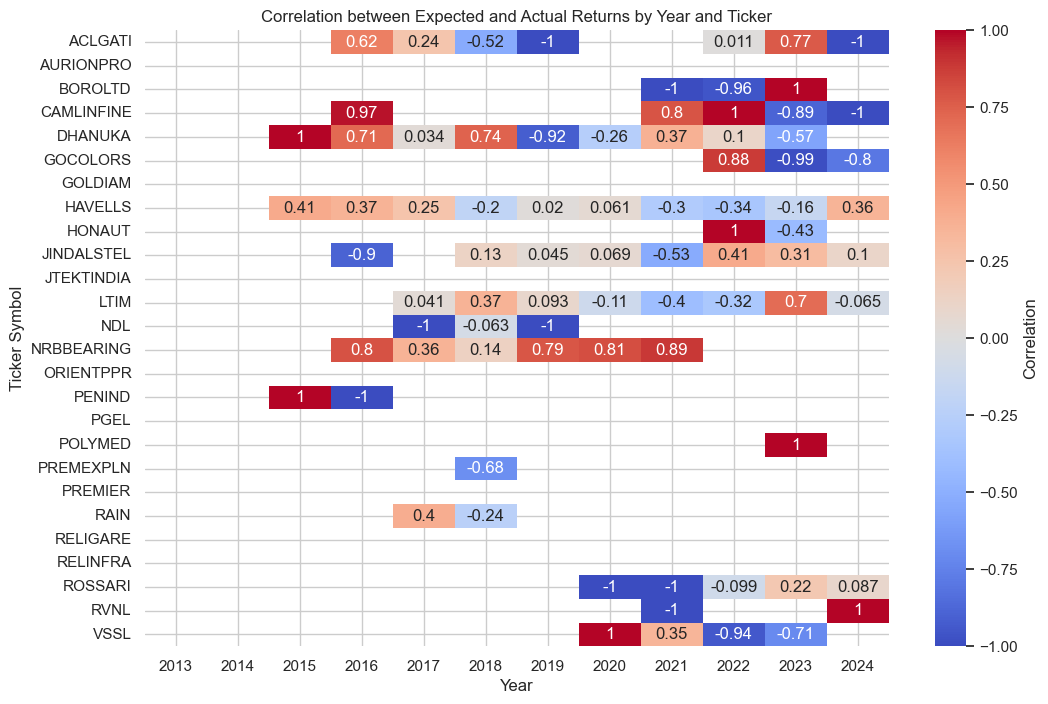

In [13]:
# Step 1: Extract year from 'date' column
filtered_df['year'] = pd.to_datetime(filtered_df['date']).dt.year

# Step 2: Calculate correlation grouped by year and ticker
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

correlation_by_year_and_ticker = filtered_df.groupby(['year', 'Symbol']).apply(calculate_correlation).reset_index(name='correlation')

# Step 3: Map the expected and actual returns
mapped_returns = filtered_df.groupby(['year', 'Symbol'])[['expected_return', 'actual_return']].mean().reset_index()

# Merge correlation results with mapped returns
merged_results = pd.merge(correlation_by_year_and_ticker, mapped_returns, on=['year', 'Symbol'])

# Step 4: Plotting
# Set up the plot environment
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# # Plot 1: Line plot of expected and actual returns for each year and ticker
# for ticker in merged_results['Symbol'].unique():
#     ticker_data = merged_results[merged_results['Symbol'] == ticker]
    
#     plt.plot(ticker_data['year'], ticker_data['expected_return'], label=f'{ticker} Expected Return', linestyle='--')
#     plt.plot(ticker_data['year'], ticker_data['actual_return'], label=f'{ticker} Actual Return', linestyle='-')

# # Plot title and labels
# plt.title("Expected vs Actual Returns by Year and Ticker")
# plt.xlabel("Year")
# plt.ylabel("Return (%)")
# plt.legend(loc="upper right")
# plt.grid(True)
# # Save the plot to the device
# plt.savefig('data/expected_vs_actual_returns_line_plot.png')
# plt.show()

# # Plot 2: Scatter plot of expected vs actual returns with correlation
# plt.figure(figsize=(10, 6))
# for ticker in merged_results['Symbol'].unique():
#     ticker_data = merged_results[merged_results['Symbol'] == ticker]
#     sns.scatterplot(data=ticker_data, x='expected_return', y='actual_return', label=ticker, s=100)

# # Scatter plot title and labels
# plt.title("Expected vs Actual Returns by Ticker")
# plt.xlabel("Expected Return (%)")
# plt.ylabel("Actual Return (%)")
# plt.legend(loc="best")
# plt.grid(True)
# # Save the scatter plot
# plt.savefig('data/expected_vs_actual_returns_scatter_plot.png')
# plt.show()


# Plot 3: Heatmap of correlations by year and ticker
pivot_table = merged_results.pivot(index="Symbol", columns="year", values="correlation")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title("Correlation between Expected and Actual Returns by Year and Ticker")
plt.xlabel("Year")
plt.ylabel("Ticker Symbol")
# Save the heatmap plot
plt.savefig('data/correlation_heatmap.png')
plt.show()

In [14]:
# Step 1: Calculate correlation grouped by sector
def calculate_correlation(group):
    return group[['expected_return', 'actual_return']].corr().iloc[0, 1]

# Group by sector and calculate the correlation for each sector
correlation_by_sector = filtered_df.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')

# Display the correlation by sector
print("Correlation between expected and actual returns by sector:")
print(correlation_by_sector)

Correlation between expected and actual returns by sector:
               Sector  correlation
0      Consumer Goods    -0.075283
1              Energy     0.141444
2             Finance    -0.121837
3          Healthcare     0.343641
4       Manufacturing     0.015537
5          Technology     0.065681
6  Telecommunications    -0.054823


C:\Users\disch\AppData\Local\Temp\ipykernel_4676\2895770494.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_sector = filtered_df.groupby('Sector').apply(calculate_correlation).reset_index(name='correlation')


In [15]:
import pandas as pd

# Filter out rows with NaN values in 'expected_return' and 'actual_return'
filtered_author_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Calculate correlations by author, excluding groups with insufficient data
author_correlations = (
    filtered_author_df.groupby('author', as_index=False)  # Keep author as a column
    .filter(lambda x: len(x) > 1)  # Ensure at least two data points
)

# Now calculate the correlation
author_correlations = (
    author_correlations.groupby('author', group_keys=False)
    .apply(lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])}))
    .reset_index()
)

# Display the results
print(author_correlations)

                              author  correlation
0                        AUM Capital     0.834745
1                        Anand Rathi     0.975618
2                      Angel Broking    -1.000000
3                        Axis Direct     0.191618
4           BOB Capital Markets Ltd.    -0.066707
5                            Bonanza     1.000000
6                Chola Wealth Direct     0.271378
7                      Dolat Capital    -0.343397
8                          Edelweiss    -0.167934
9                              Emkay     0.036317
10                Geojit BNP Paribas    -0.099693
11                   HDFC Securities     0.143396
12                      ICICI Direct    -0.123333
13          ICICI Securities Limited     0.089705
14                      IDBI Capital    -0.122017
15                      JM Financial    -1.000000
16                         KRChoksey     0.321818
17                             Karvy     0.016246
18              Keynote Capitals Ltd    -0.544101


C:\Users\disch\AppData\Local\Temp\ipykernel_4676\1515320299.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])}))


In [31]:
import pandas as pd

# Using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'expected_return'] = pd.to_numeric(filtered_df['expected_return'], errors='coerce')
filtered_df.loc[:, 'actual_return'] = pd.to_numeric(filtered_df['actual_return'], errors='coerce')

# Drop rows where either 'expected_return' or 'actual_return' is NaN
filtered_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Function to calculate correlation with minimum group size check
def calculate_correlation(df, group_cols):
    # Filter groups with at least two data points to avoid degrees of freedom error
    df_grouped = df.groupby(group_cols).filter(lambda x: len(x) > 1)
    return df_grouped.groupby(group_cols, as_index=False).apply(
        lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])})
    ).reset_index(drop=True)

# (1) Correlation by (year, author)
year_author_corr = calculate_correlation(filtered_df, ['year', 'author'])

# Display the results
print("Correlation by (year, author):\n", year_author_corr)

Correlation by (year, author):
     year                    author  correlation
0   2015  BOB Capital Markets Ltd.     0.842666
1   2015       Chola Wealth Direct     0.086817
2   2015           Phillip Capital     0.254804
3   2016       Chola Wealth Direct     0.757072
4   2016           HDFC Securities     0.538052
..   ...                       ...          ...
93  2024                 KRChoksey    -0.385458
94  2024      Keynote Capitals Ltd     0.288138
95  2024             Motilal Oswal    -0.028693
96  2024       Prabhudas Lilladhar     0.496572
97  2024                 Sharekhan     1.000000

[98 rows x 3 columns]


C:\Users\disch\AppData\Local\Temp\ipykernel_4676\2909189485.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


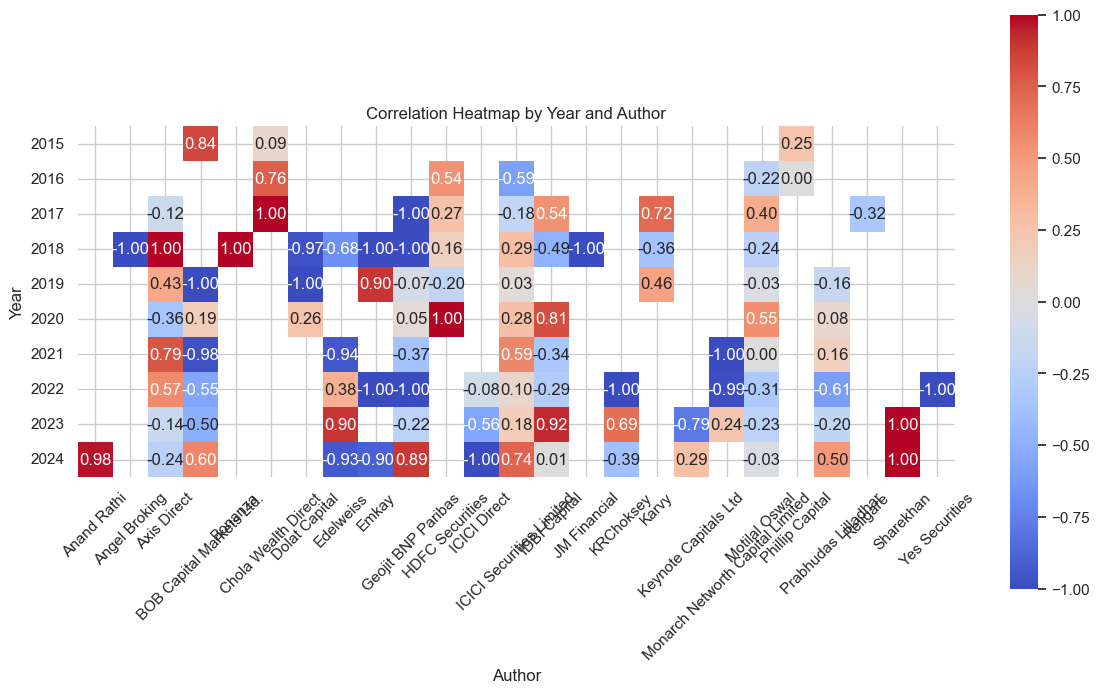

In [32]:
# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data = year_author_corr.pivot(index='year', columns='author', values='correlation')

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Year and Author')
plt.xlabel('Author')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
# (2) Correlation by (year, sector)
year_sector_corr = calculate_correlation(filtered_df, ['year', 'Sector'])
print("\nCorrelation by (year, sector):\n", year_sector_corr)


Correlation by (year, sector):
     year              Sector  correlation
0   2015      Consumer Goods     0.406506
1   2015          Technology     0.916257
2   2016      Consumer Goods     0.366037
3   2016          Healthcare     0.621926
4   2016       Manufacturing    -0.547948
5   2016          Technology     0.575729
6   2017      Consumer Goods     0.250595
7   2017             Finance     0.040604
8   2017          Healthcare     0.244423
9   2017       Manufacturing     0.378522
10  2017          Technology     0.033824
11  2017  Telecommunications    -1.000000
12  2018      Consumer Goods    -0.199377
13  2018              Energy    -0.682790
14  2018             Finance     0.365534
15  2018          Healthcare    -0.524752
16  2018       Manufacturing    -0.128119
17  2018          Technology     0.652988
18  2018  Telecommunications    -0.063471
19  2019      Consumer Goods     0.019893
20  2019             Finance     0.093031
21  2019          Healthcare    -1.000000
2

C:\Users\disch\AppData\Local\Temp\ipykernel_4676\2909189485.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


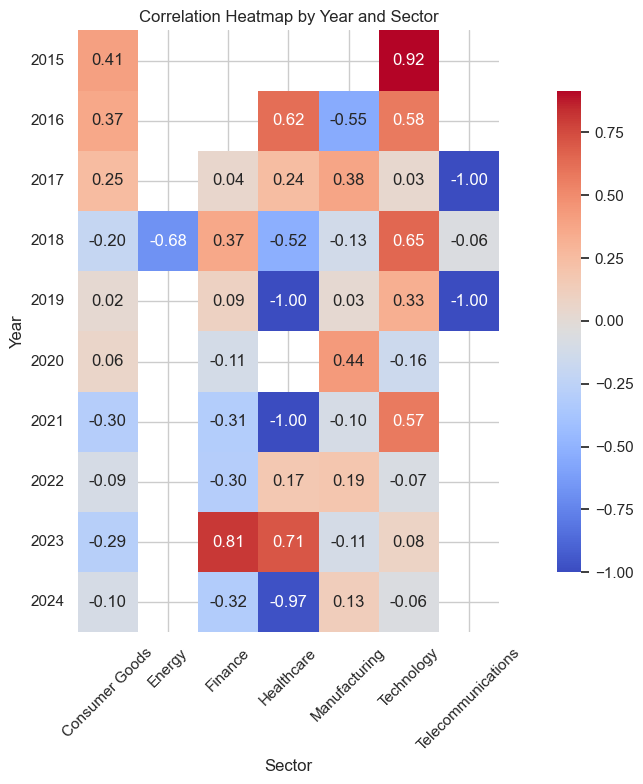

In [34]:
# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data_sector = year_sector_corr.pivot(index='year', columns='Sector', values='correlation')

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_sector, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Year and Sector')
plt.xlabel('Sector')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [35]:
filtered_df['Sector'].unique()

array(['Healthcare', 'Finance', 'Technology', 'Consumer Goods',
       'Manufacturing', 'Telecommunications', 'Energy'], dtype=object)

In [36]:
filtered_df['author'].unique()

array(['Edelweiss', 'Hem Securities', 'ICICI Securities Limited', 'Karvy',
       'Monarch Networth Capital Limited', 'BOB Capital Markets Ltd.',
       'Ventura', 'Axis Direct', 'Emkay', 'HDFC Securities',
       'Phillip Capital', 'Bonanza', 'Dolat Capital',
       'Prabhudas Lilladhar', 'Systematix Group', 'Anand Rathi',
       'Chola Wealth Direct', 'Geojit BNP Paribas', 'ICICI Direct',
       'JM Financial', 'Keynote Capitals Ltd', 'Kotak Securities',
       'Motilal Oswal', 'Reliance Securities', 'Way2Wealth',
       'Yes Securities', 'Sharekhan', 'AUM Capital', 'Angel Broking',
       'IDBI Capital', 'GEPL Capital', 'Religare',
       'Joindre Capital Services',
       'Asit C Mehta Investment Intermediates',
       'Rudra Shares and Stock Brokers Ltd', 'KRChoksey'], dtype=object)

In [37]:
# Sort filtered_df by Company Name, then by author, and then by date
sorted_filtered_df = filtered_df.sort_values(by=['Company Name', 'author', 'date']).reset_index(drop=True)

sorted_filtered_df.to_csv('sorted_filtered_df.csv', index=False)

In [38]:
# (3) Correlation by (sector, author)
sector_author_corr = calculate_correlation(filtered_df, ['Sector', 'author'])
print("\nCorrelation by (sector, author):\n", sector_author_corr)


Correlation by (sector, author):
                 Sector                            author  correlation
0       Consumer Goods                       Anand Rathi     0.999894
1       Consumer Goods                       Axis Direct    -1.000000
2       Consumer Goods          BOB Capital Markets Ltd.    -0.251559
3       Consumer Goods               Chola Wealth Direct     0.271378
4       Consumer Goods                     Dolat Capital    -0.119958
5       Consumer Goods                         Edelweiss    -0.712385
6       Consumer Goods                             Emkay    -0.896341
7       Consumer Goods                Geojit BNP Paribas    -0.311422
8       Consumer Goods                   HDFC Securities     0.184101
9       Consumer Goods                      ICICI Direct     0.290493
10      Consumer Goods          ICICI Securities Limited    -0.035375
11      Consumer Goods                      JM Financial    -1.000000
12      Consumer Goods                             Karv

C:\Users\disch\AppData\Local\Temp\ipykernel_4676\2909189485.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


In [42]:
import pandas as pd

# Custom function to calculate correlation by 'company' and 'author'
def calculate_company_author_correlation(df):
    correlation_results = []

    # Group the DataFrame by 'company' and 'author'
    grouped_df = df.groupby(['Company Name', 'author'])

    # Calculate correlation within each group
    for (company, author), group_data in grouped_df:
        # Only compute correlation if there are at least two data points
        if group_data['expected_return'].count() > 1:
            # Calculate Pearson correlation between 'expected_return' and 'actual_return'
            corr = group_data['expected_return'].corr(group_data['actual_return'])
            if corr is not None:  # Exclude None results
                correlation_results.append({
                    'Company Name': company,
                    'author': author,
                    'correlation': corr
                })

    # Convert results to DataFrame
    correlation_df = pd.DataFrame(correlation_results)
    return correlation_df

# Example usage:
company_author_corr = calculate_company_author_correlation(filtered_df)
print("\nCorrelation by (Company Name, author):\n", company_author_corr)


Correlation by (Company Name, author):
                        Company Name                            author  \
0             allcargo gati limited                         Edelweiss   
1             allcargo gati limited          ICICI Securities Limited   
2                   borosil limited  Monarch Networth Capital Limited   
3      camlin fine sciences limited                       Axis Direct   
4      camlin fine sciences limited                             Emkay   
..                              ...                               ...   
65          rossari biotech limited                         Edelweiss   
66          rossari biotech limited          ICICI Securities Limited   
67          rossari biotech limited                         KRChoksey   
68  vardhman special steels limited                      ICICI Direct   
69  vardhman special steels limited          ICICI Securities Limited   

    correlation  
0      0.796896  
1      0.193003  
2      0.321933  
3      0.2

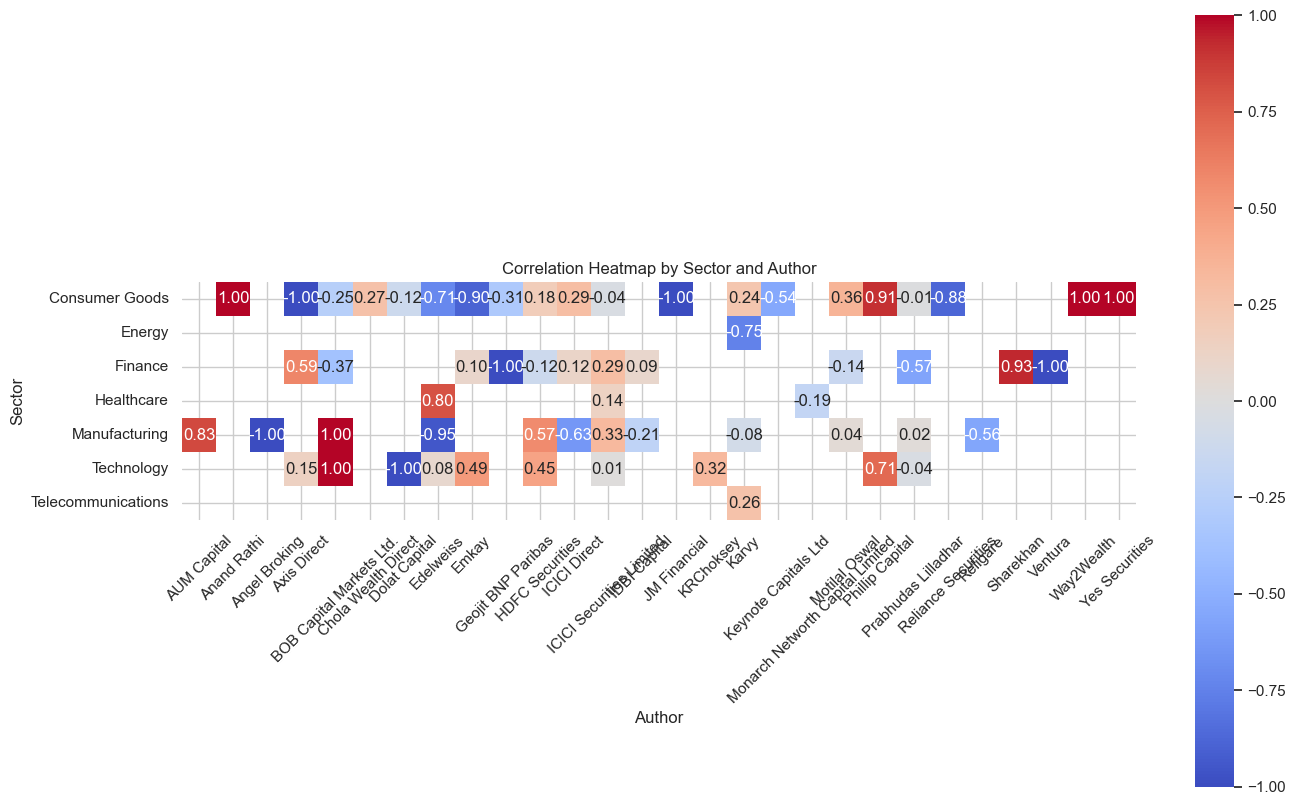

In [43]:
# Pivot the DataFrame to get a matrix for the heatmap
heatmap_data_author = sector_author_corr.pivot(index='Sector', columns='author', values='correlation')

# Display the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_author, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap by Sector and Author')
plt.xlabel('Author')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
# 31/10

# Using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'expected_return'] = pd.to_numeric(filtered_df['expected_return'], errors='coerce')
filtered_df.loc[:, 'actual_return'] = pd.to_numeric(filtered_df['actual_return'], errors='coerce')

# Drop rows where either 'expected_return' or 'actual_return' is NaN
filtered_df = filtered_df.dropna(subset=['expected_return', 'actual_return'])

# Function to calculate correlation with minimum group size check
def calculate_correlation(df, group_cols):
    # Filter groups with at least two data points to avoid degrees of freedom error
    df_grouped = df.groupby(group_cols).filter(lambda x: len(x) > 1)
    return df_grouped.groupby(group_cols, as_index=False).apply(
        lambda x: pd.Series({'correlation': x['expected_return'].corr(x['actual_return'])})
    ).reset_index(drop=True)

# (1) Correlation by (sector, author)
sector_author_corr = calculate_correlation(filtered_df, ['Sector', 'author'])
print("\nCorrelation by (sector, author):\n", sector_author_corr)


Correlation by (sector, author):
                 Sector                            author  correlation
0       Consumer Goods                       Anand Rathi     0.999894
1       Consumer Goods                       Axis Direct    -1.000000
2       Consumer Goods          BOB Capital Markets Ltd.    -0.251559
3       Consumer Goods               Chola Wealth Direct     0.271378
4       Consumer Goods                     Dolat Capital    -0.119958
5       Consumer Goods                         Edelweiss    -0.712385
6       Consumer Goods                             Emkay    -0.896341
7       Consumer Goods                Geojit BNP Paribas    -0.311422
8       Consumer Goods                   HDFC Securities     0.184101
9       Consumer Goods                      ICICI Direct     0.290493
10      Consumer Goods          ICICI Securities Limited    -0.035375
11      Consumer Goods                      JM Financial    -1.000000
12      Consumer Goods                             Karv

C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2222097451.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


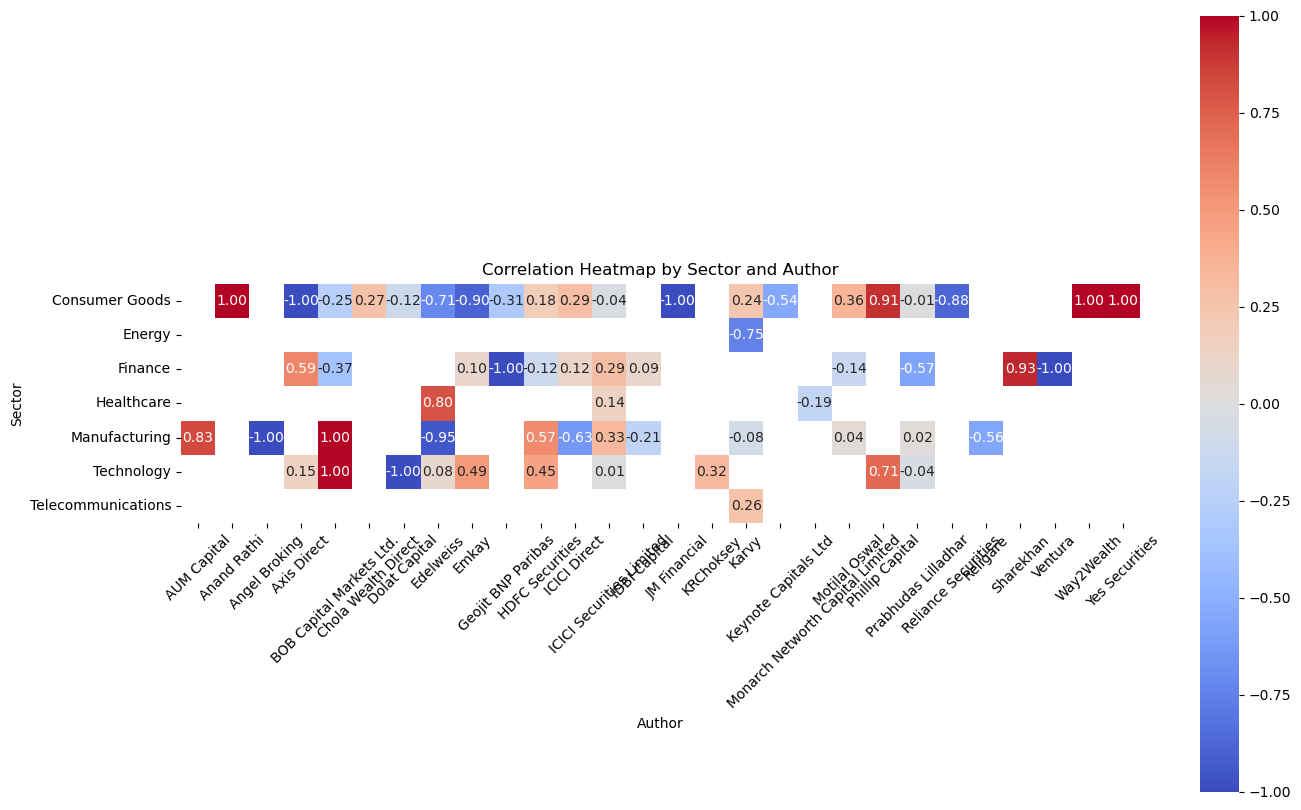

In [28]:

# Pivot the DataFrames for heatmap visualization
heatmap_data_author = sector_author_corr.pivot(index='Sector', columns='author', values='correlation')

# Plot heatmap for (sector, author)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_author, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap by Sector and Author')
plt.xlabel('Author')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:

# (2) Correlation by (sector, year)
sector_year_corr = calculate_correlation(filtered_df, ['Sector', 'year'])
print("\nCorrelation by (sector, year):\n", sector_year_corr)


Correlation by (sector, year):
                 Sector  year  correlation
0       Consumer Goods  2015     0.406506
1       Consumer Goods  2016     0.366037
2       Consumer Goods  2017     0.250595
3       Consumer Goods  2018    -0.199377
4       Consumer Goods  2019     0.019893
5       Consumer Goods  2020     0.060915
6       Consumer Goods  2021    -0.296688
7       Consumer Goods  2022    -0.094439
8       Consumer Goods  2023    -0.286062
9       Consumer Goods  2024    -0.100194
10              Energy  2018    -0.682790
11             Finance  2017     0.040604
12             Finance  2018     0.365534
13             Finance  2019     0.093031
14             Finance  2020    -0.114859
15             Finance  2021    -0.306501
16             Finance  2022    -0.302963
17             Finance  2023     0.808219
18             Finance  2024    -0.318169
19          Healthcare  2016     0.621926
20          Healthcare  2017     0.244423
21          Healthcare  2018    -0.524752
2

C:\Users\disch\AppData\Local\Temp\ipykernel_11620\2222097451.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_grouped.groupby(group_cols, as_index=False).apply(


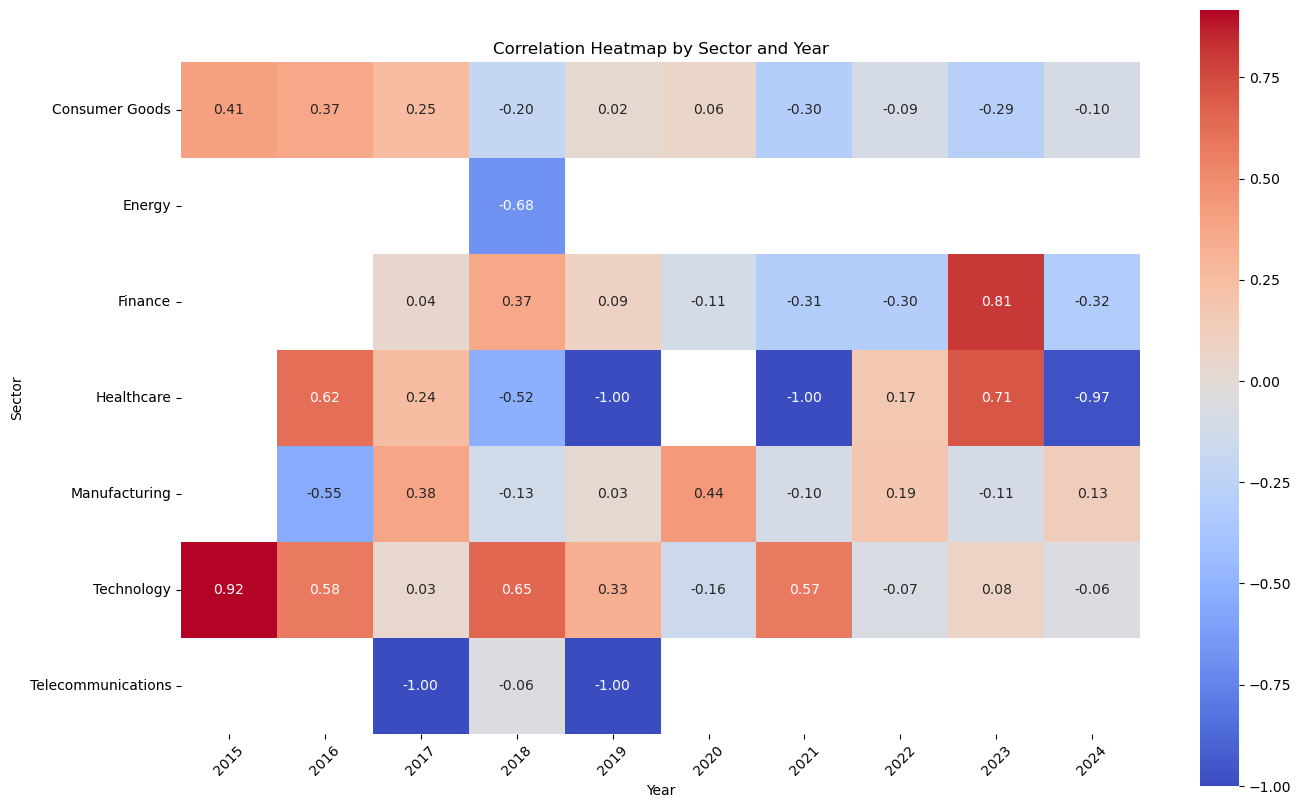

In [30]:
heatmap_data_year = sector_year_corr.pivot(index='Sector', columns='year', values='correlation')
# Plot heatmap for (sector, year)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_year, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Sector')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
